# Sales Analysis

### Import Necessary Libraries

In [69]:
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import numpy as np

#### Merge the 12 months of sales into a single csv file

In [2]:
path = './Sales_Data/'
all_files = glob.glob(os.path.join(path, "Sales_*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( "merged.csv", index=False)

In [3]:
df = pd.read_csv("merged.csv")

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Drop rows with all NaNs

In [5]:
nan_df = df[df.isna().any(axis=1)]
nan_df.shape

(545, 6)

In [6]:
df.dropna(axis=0, how="all", inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
#Check if there are any more NaNs
df.isna().any().sum()

0

#### Question 1: What was the best month for sales? How much was earned that month?


#### Add Month Column

In [8]:
df['Month'] = df['Order Date'].str[0:2]
df[df['Month']=="Or"].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [9]:
#deleting rows with Month as 'Or'
df.drop(df[df['Month']=='Or'].index, inplace=True)

In [10]:
#Convert columns to the correct type
df['Month'] = df['Month'].astype('int32')
df['Price Each']  = pd.to_numeric(df['Price Each'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

In [11]:
#Adding a sales column
df['Sales'] = df['Price Each'] * df['Quantity Ordered']

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [13]:
#Moving Sales column next to Price Each column
cols = df.columns.tolist()
cols = cols[:4] + cols[-1:] + cols[4:7]

In [14]:
df = df[cols]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [15]:
sales_df = df.groupby(['Month']).sum().reset_index()

In [16]:
sales_df.head()

,Month,Quantity Ordered,Price Each,Sales
0,1,10903,1.811768e+06,1.822257e+06
1,2,13449,2.188885e+06,2.202022e+06
2,3,17005,2.791208e+06,2.807100e+06
3,4,20558,3.367671e+06,3.390670e+06
4,5,18667,3.135125e+06,3.152607e+06


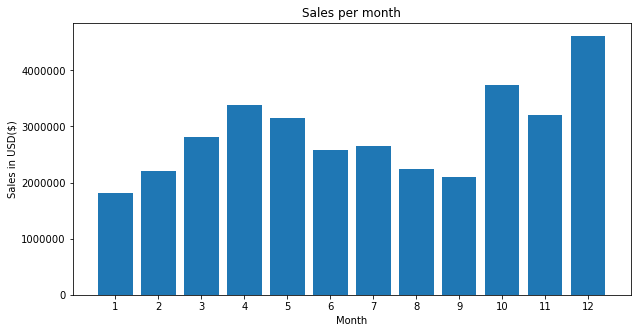

In [17]:
fig = plt.figure(figsize = (10, 5))
plt.bar(sales_df['Month'], sales_df['Sales'])
plt.xticks(sales_df['Month'])
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("Month")
plt.ylabel("Sales in USD($)")
plt.title("Sales per month")
plt.show()

#### Answer: Sales was maximum in December

#### Question 2: Which US city had the highest number of sales?

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [19]:
#adding a city column
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [20]:
city_sales = df.groupby(['City']).sum().reset_index()
city_sales

,City,Quantity Ordered,Price Each,Sales,Month
0,Atlanta,16602,2.779908e+06,2.795499e+06,104794
1,Austin,11153,1.809874e+06,1.819582e+06,69829
2,Boston,22528,3.637410e+06,3.661642e+06,141112
3,Dallas,16730,2.752628e+06,2.767975e+06,104620
4,Los Angeles,33289,5.421435e+06,5.452571e+06,208325
5,New York City,27932,4.635371e+06,4.664317e+06,175741
6,Portland,14053,2.307747e+06,2.320491e+06,87765
7,San Francisco,50239,8.211462e+06,8.262204e+06,315520
8,Seattle,16553,2.733296e+06,2.747755e+06,104941


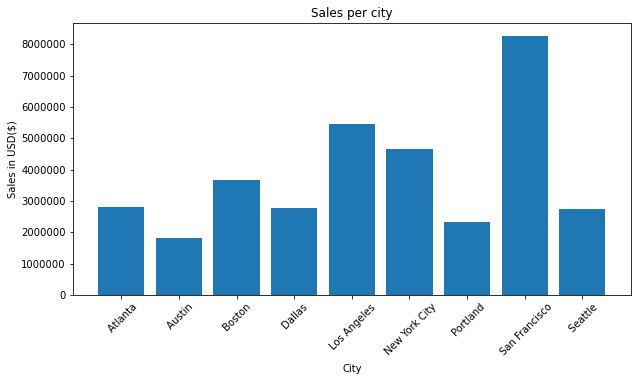

In [21]:
fig = plt.figure(figsize = (10, 5))
plt.bar(city_sales['City'], city_sales['Sales'])
plt.xticks(rotation = 45)
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("City")
plt.ylabel("Sales in USD($)")
plt.title("Sales per city")
plt.show()

#### Answer: San Francisco has the highest amount of sales

#### Question 3: What time should we display advertisements to maximise likelihood of customer's buying product?

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [25]:
df['Hour'] = [x.hour for x in df['Order Date']]

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,9


In [27]:
ads_df = df.groupby('Hour').sum().reset_index()

In [28]:
ads_df

,Hour,Quantity Ordered,Price Each,Sales,Month
0,0,4428,709296.70,713721.27,27554
1,1,2619,458490.00,460866.88,16657
2,2,1398,233833.64,234851.44,8507
3,3,928,144726.42,145757.89,5904
4,4,937,162058.18,162661.01,6148
5,5,1493,229621.21,230679.82,9301
6,6,2810,445000.11,448113.00,17539
7,7,4556,740568.11,744854.12,28850
8,8,7002,1185970.62,1192348.97,43626
9,9,9816,1628498.49,1639030.58,60981


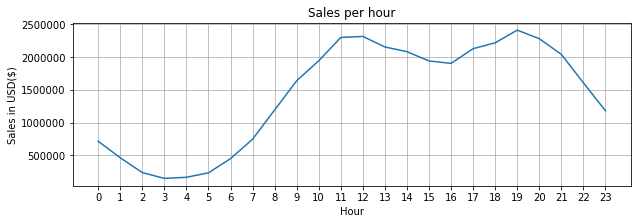

In [29]:
fig = plt.figure(figsize = (10,3))
plt.plot(ads_df['Hour'], ads_df['Sales'])
plt.xticks(ads_df['Hour'])
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("Hour")
plt.ylabel("Sales in USD($)")
plt.title("Sales per hour")
plt.grid()
plt.show()

#### Answer: We could probably play the ads at around 10 AM and 6 PM onwards since the sale peaks at 11 AM and 7 PM

#### Question 4: What products are often sold together?

In [30]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,9


In [31]:
orders_df = df[df['Order ID'].duplicated(keep=False)]

In [32]:
orders_df['Grouped'] = orders_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

<ipython-input-32-63b56ebf02a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df['Grouped'] = orders_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [33]:
orders_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Grouped
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,19,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,19,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston,11,"Bose SoundSport Headphones, Bose SoundSport He..."


In [34]:
orders_df = orders_df[['Order ID', 'Grouped']].drop_duplicates()

In [45]:
orders_df.head()

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [49]:
from itertools import combinations
from collections import Counter

count = Counter()

a_list = list()

for row in orders_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


#### Answer: iPhone, Lightning Charging Cable and Google Phone, USB-C charging cable is sold most commonly

#### Question 5: What product sold the most and why do think it sold the most?

In [51]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,9


In [61]:
prod_df = df.groupby('Product')['Quantity Ordered'].sum().reset_index()

In [62]:
prod_df

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


In [74]:
#sorting Quantity Ordered column in descending order
prod_df = prod_df.sort_values(by='Quantity Ordered')
prod_df.head()

,Product,Quantity Ordered
10,LG Dryer,646
11,LG Washing Machine,666
16,Vareebadd Phone,2068
0,20in Monitor,4129
14,ThinkPad Laptop,4130


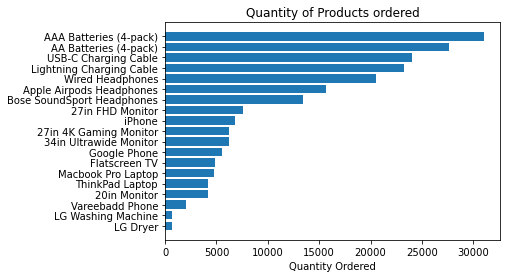

In [76]:
fig, ax = plt.subplots()
y_pos = np.arange(len(prod_df['Product']))
ax.barh(y_pos, prod_df['Quantity Ordered'])
ax.set_yticks(y_pos)
ax.set_yticklabels(prod_df['Product'])
ax.set_xlabel('Quantity Ordered')
ax.set_title('Quantity of Products ordered')
plt.show()

In [78]:
#visualising the products by their prices
prod_price_df = df[['Product', 'Price Each']].drop_duplicates()
prod_price_df = prod_price_df.sort_values(by='Price Each', ascending=False)
prod_price_df.head()

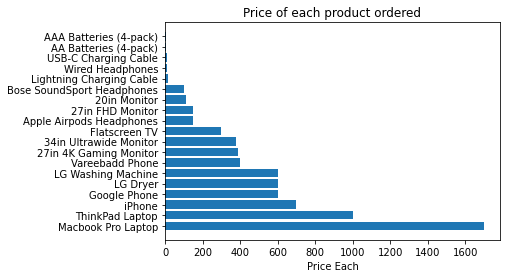

In [85]:
fig, ax = plt.subplots()
y_pos = np.arange(len(prod_price_df['Product']))
ax.barh(y_pos, prod_price_df['Price Each'])
ax.set_yticks(y_pos)
ax.set_yticklabels(prod_price_df['Product'])
ax.set_xlabel('Price Each')
ax.set_title('Price of each product ordered')
plt.show()

#### Answer: AAA Batteries were sold the most probably because they cost less. Observing the trend, products that cost less are sold in large numbers.